# Importing required packages

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# 1D DFT 

<StemContainer object of 3 artists>

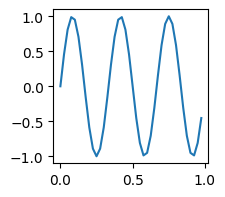

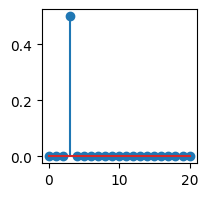

In [26]:
def DFT(ip,N):
    op=np.zeros_like(ip,dtype=complex)
    n=np.array(range(N))
    for k in range(N):
        bas=np.exp(-2j*pi*k*n/N)
        op[k]=np.dot(ip,bas)
    return op

fs=40
T=1/fs
N=40
t=np.array(range(N))*T

Xt=np.sin(2*pi*3*t)
plt.figure(figsize=(2,2))
plt.plot(t,Xt)


Xf=DFT(Xt,N)
K=np.array(range(N//2+1))

freq=K*(fs/N)
plt.figure(figsize=(2,2))
plt.stem(freq,abs(Xf[:N//2+1])/N)

## ***Convolution can also be done using 1D FFT by flattening the matrix

## 👇 this is jst to show that fft-1D can be used on a matrix by flattening it...

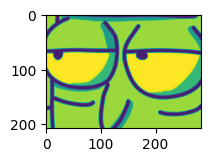

In [21]:
img=cv2.imread(r"C:\Users\Krish\Downloads\rick1.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
a=img.shape
Fdft=np.fft.fft(np.reshape(img,(1,-1)))  # image flattened
Idft=np.fft.ifft(Fdft)
Idft=Idft.reshape(a)
plt.figure(figsize=(2,2))
plt.imshow(np.real(Idft))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# 2D DFT, IDFT

### Basically, an image is convolved with an edge detection kernel... So this code for getting the same convolved output with FFT (DFT)

In [41]:
def Dft2(ip):
    row, col = ip.shape
    op = np.zeros_like(ip, dtype=complex)
    for k in range(row):
        if (k+1)%100==0:print(k)
        y = np.arange(col)
        bas1 = np.exp(-2j * np.pi * k * np.arange(row) / row)
        for l in range(col):
            bas2 = np.exp(-2j * np.pi * l * y / col)
            bas = np.outer(bas1, bas2)
            # print(bas.shape,bas1.shape,bas2.shape,ip.shape)
            op[k,l] = np.sum(ip*bas)
    return op

def padd(a,b,k1):
    top = (a[0] - b[0]) // 2
    bott = a[0] - b[0] - top
    left = (a[1] - b[1]) // 2
    right = a[1] - b[1] - left
    return np.pad(k1, ((top, bott), (left, right)), mode='constant', constant_values=0)

def IDft2(ip):
    op=np.zeros_like(ip,dtype=complex)
    row, col = ip.shape
    for k in range(row):
        bas1=np.exp(2j*np.pi*np.arange(row)*k/row)
        for l in range(col):
            bas2=np.exp(2j*np.pi*np.arange(col)*l/col)
            bas=np.outer(bas1,bas2)
            op[k,l]=(np.sum(ip*bas))/(row*col)
    return op

In [27]:
kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

Ip=cv2.imread(r"C:\Users\Krish\Downloads\terence.png")
Ip=cv2.cvtColor(Ip,cv2.COLOR_BGR2GRAY)

Dft_Ip=Dft2(np.array(Ip))
kernel=Dft2(padd(Dft_Ip.shape,kernel.shape,kernel))

verify=Dft_Ip
Ip_IDFT=Dft_Ip*kernel

99
199
299
99
199
299


Text(0.5, 1.0, 'Original Image')

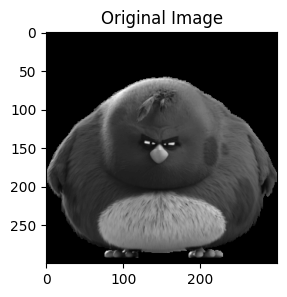

In [28]:
plt.figure(figsize=(3,3))
plt.imshow(Ip,cmap='gray')
plt.title("Original Image")

# To verify whether my DFT is working or not

In [29]:
Op_IDFT=IDft2(verify)

Text(0.5, 1.0, 'IDFT image')

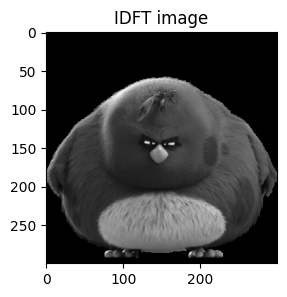

In [30]:
plt.figure(figsize=(3,3))
plt.imshow(np.real(Op_IDFT),cmap='gray')
plt.title("IDFT image")

In [31]:
op=IDft2(Ip_IDFT)
op=np.real(op)

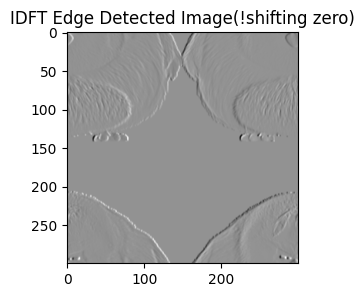

In [32]:
plt.figure(figsize=(3,3))
plt.imshow(op,cmap='gray')
plt.title('IDFT Edge Detected Image(!shifting zero)')   #B4 shifting zero
plt.show()

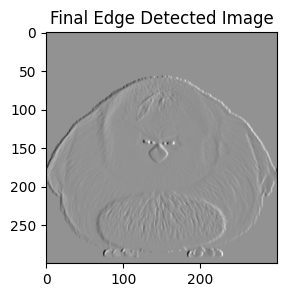

In [33]:
from math import ceil
r=ceil(op.shape[0]/2)
c=ceil(op.shape[1]/2)
zer=np.zeros(op.shape)

zer[0:r,0:c]=op[r:,c:]
zer[r:,c:]=op[0:r,0:c]
zer[0:r,c:]=op[r:,0:c]
zer[r:,0:c]=op[0:r,c:]
plt.figure(figsize=(3,3))
plt.imshow(zer,cmap='gray')
plt.title('Final Edge Detected Image')  #after shifting zero
plt.show()

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Same Procedure ( Innbuilt FFT command)

## (to verify the final output)

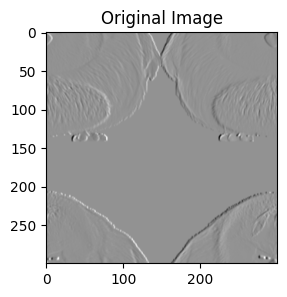

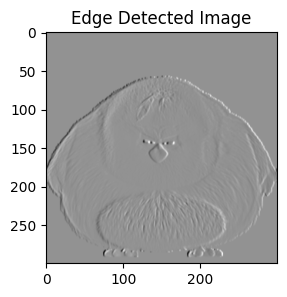

In [5]:
img=cv2.imread(r"C:\Users\Krish\Downloads\terence.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
k1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

a=img.shape
b=k1.shape
top = (a[0] - b[0]) // 2
bott = a[0] - b[0] - top
left = (a[1] - b[1]) // 2
right = a[1] - b[1] - left
k1 = np.pad(k1, ((top, bott), (left, right)), mode='constant', constant_values=0)


f1=np.fft.fftn(img)
k1=np.fft.fftn(k1)
op=f1*k1
op=np.fft.ifftn(op)
plt.figure(figsize=(3,3))
plt.title('Original Image')
plt.imshow(np.real(op),cmap='gray')

from math import ceil
a=ceil(img.shape[0]/2)
b=ceil(img.shape[1]/2)
zer=np.zeros(op.shape)
op=op.real

zer[0:a,0:b]=op[a:,b:]
zer[a:,b:]=op[0:a,0:b]
zer[0:a,b:]=op[a:,0:b]
zer[a:,0:b]=op[0:a,b:]

plt.figure(figsize=(3,3))
plt.imshow(zer,cmap='gray')
plt.title('Edge Detected Image')
plt.show()